In [1]:
pwd

'/Users/ssolieva/Desktop/github_repo/Q23_paper/CH01_mature_AF2_control/alphafold/rmsd_analysis'

In [7]:
path_3tcl = "3tcl_CH04_HC_renum.pdb"
path_to_af_directory = "/Users/ssolieva/Desktop/github_repo/Q23_paper/CH01_mature_AF2_control/alphafold/control_CH01_mature/"

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os.path
import random

# Make a list of paths to each of the AF models 

In [10]:
# read the model list 
f = open(path_to_af_directory+"pdb_paths_control_CH01_mature.txt", "r")
model_pdb_paths = f.read().splitlines()
f.close()
print(f"There are {len(model_pdb_paths)} models.")

There are 25 models.


# RMSD calculations

In [72]:
# load in a predicted structure and pdb 3tcl:
control = md.load(model_pdb_paths[0])
crystal = md.load(path_3tcl)
print(len(control.topology.select('chainid 0 and name CA')),
      len(crystal.topology.select('chainid 0 and name CA')))

# find where the CDRH3 and motif is in the CH01 control structure:
control_CA_atoms = control.topology.select('chainid 0 and name CA')
resSeq_individual = []
for i in range(len(control_CA_atoms)):
    resSeq_individual.append(control.topology.atom(control_CA_atoms[i]).residue.code)
resSeq = "".join(resSeq_individual) # sequence of CH01 variable heavy chain. 
control_cdrh3 = 'ARGTDYTIDDAGIHYQGSGTFWYFDL'
control_cdrh3_index = resSeq.find(control_cdrh3)
print(f'The index of the CDRH3 in CH01 is: \t\t {control_cdrh3_index}')
control_motif = 'YQGSG'
control_motif_index = resSeq.find(control_motif)
print(f'The index of the {control_motif} motif in CH01 is: \t {control_motif_index}')

# find where the CDRH3 and motif is in the crystal structure PDB 3TCL:
crystal_CA_atoms = crystal.topology.select('chainid 0 and name CA')
resSeq_individual = []
for i in range(len(crystal_CA_atoms)):
    resSeq_individual.append(crystal.topology.atom(crystal_CA_atoms[i]).residue.code)
resSeq = "".join(resSeq_individual) # sequence of CH01 variable heavy chain. 
crystal_cdrh3 = 'ARGTDYTIDDQGIRYQGSGTFWYFDV'
crystal_cdrh3_index = resSeq.find(crystal_cdrh3)
print(f'The index of the CDRH3 in PDB 3TCL is: \t\t {crystal_cdrh3_index}')
crystal_motif = 'YQGSG'
crystal_motif_index = resSeq.find(crystal_motif)
print(f'The index of the {crystal_motif} motif in PDB 3TCL is: \t {crystal_motif_index}')

The index of the CDRH3 in CH01 is: 		 96
The index of the YQGSG motif in CH01 is: 	 110
The index of the CDRH3 in PDB 3TCL is: 		 96
The index of the YQGSG motif in PDB 3TCL is: 	 110


In [58]:
def rmsd_to_reference_structure(predicted_structure_path, reference_structure_path, predicted_range, reference_range):
    '''
    input: two paths 
        (one for the predicted structure and one for the reference structure. Use the correct order!!)
    output: RMSD of selected region. 
    '''
    predicted_structure = md.load_pdb(f"{predicted_structure_path}")
    reference_structure = md.load(f"{reference_structure_path}") 
    
    predicted_structure_CA_atoms = predicted_structure.topology.select(f'chainid 0 and residue {predicted_range[0]+1} to {predicted_range[1]} and name CA')
    reference_structure_CA_atoms = reference_structure.topology.select(f'chainid 0 and residue {reference_range[0]+1} to {reference_range[1]} and name CA')
    
    rmsd_value = md.rmsd(predicted_structure, reference_structure, atom_indices=predicted_structure_CA_atoms, ref_atom_indices=reference_structure_CA_atoms)
    return rmsd_value[0]

In [77]:
# calculate RMSDs
rmsd_cdrh3 = []
for i in range(len(model_pdb_paths)):
    predicted_pdb_path = model_pdb_paths[i]
    rmsd_cdrh3.append(rmsd_to_reference_structure(predicted_pdb_path, path_3tcl, 
                            [control_cdrh3_index, control_cdrh3_index+len(control_cdrh3)], 
                            [crystal_cdrh3_index, crystal_cdrh3_index+len(crystal_cdrh3)]))
    
rmsd_regex = []
for i in range(len(model_pdb_paths)):
    predicted_pdb_path = model_pdb_paths[i]
    rmsd_regex.append(rmsd_to_reference_structure(predicted_pdb_path, path_3tcl, 
                            [control_motif_index, control_motif_index+len(control_motif)], 
                            [crystal_motif_index, crystal_motif_index+len(crystal_motif)]))

# Plot RMSD

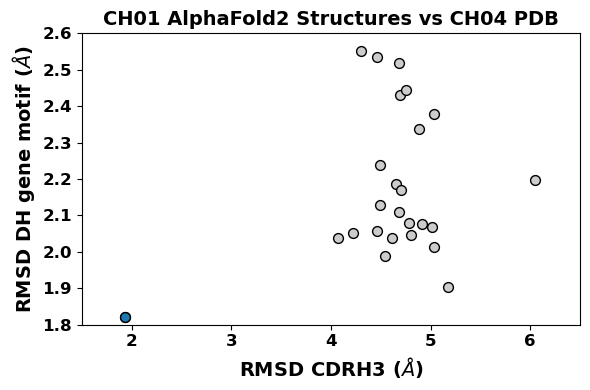

In [95]:
# cdrh3 vs regex
plt.figure(figsize=[6,4])
plt.scatter(np.array([rmsd_cdrh3])*10, np.array([rmsd_regex])*10, 
            edgecolor='k', s=50, c= '0.8')
plt.scatter(rmsd_cdrh3[0]*10,rmsd_regex[0]*10, s=50, alpha=1, color="C0", edgecolor='k')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.ylim(1.8,2.6)
plt.xlim(1.5,6.5)
plt.xlabel("RMSD CDRH3 ($\AA$)",fontsize=14, weight='bold')
plt.ylabel("RMSD DH gene motif ($\AA$)", fontsize=14, weight='bold')
plt.title("CH01 AlphaFold2 Structures vs CH04 PDB", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('../Figures/CH01_mature_AF2_control_vs_CH04_PDB_3TCL_blue_dot.pdf', dpi=300)
plt.show()

# Print RMSD values

In [103]:
for i in range(len(rmsd_cdrh3)):
    print(rmsd_cdrh3[i],'\t', rmsd_regex[i], '\t', model_pdb_paths[i][80:])

0.1934997 	 0.18209781 	 control_CH01_mature/ranked_0.pdb
0.5172692 	 0.190469 	 control_CH01_mature/ranked_1.pdb
0.46825707 	 0.25187632 	 control_CH01_mature/ranked_10.pdb
0.5038039 	 0.23788214 	 control_CH01_mature/ranked_11.pdb
0.4071544 	 0.2037958 	 control_CH01_mature/ranked_12.pdb
0.46500975 	 0.21861263 	 control_CH01_mature/ranked_13.pdb
0.5014302 	 0.20676558 	 control_CH01_mature/ranked_14.pdb
0.4701812 	 0.21686456 	 control_CH01_mature/ranked_15.pdb
0.6048256 	 0.21965191 	 control_CH01_mature/ranked_16.pdb
0.44612178 	 0.20585465 	 control_CH01_mature/ranked_17.pdb
0.46803188 	 0.21103293 	 control_CH01_mature/ranked_18.pdb
0.4910803 	 0.20772192 	 control_CH01_mature/ranked_19.pdb
0.47819033 	 0.20796752 	 control_CH01_mature/ranked_2.pdb
0.44654584 	 0.25350982 	 control_CH01_mature/ranked_20.pdb
0.42225546 	 0.2052734 	 control_CH01_mature/ranked_21.pdb
0.4690981 	 0.24304858 	 control_CH01_mature/ranked_22.pdb
0.44922397 	 0.22373429 	 control_CH01_mature/ranked_23.